In [53]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmocean as cmo
import matplotlib.animation as animation
from matplotlib.colors import LightSource
from matplotlib import cm
import matplotlib.colors

In [54]:
# Open laddie output and print coordinates and available variables
data_folder = '../example-data'
laddie_output = xr.open_dataset(f'{data_folder}/example_output_CD.nc')
print(laddie_output.var)

<bound method DatasetAggregations.var of <xarray.Dataset>
Dimensions:     (y: 170, x: 147)
Coordinates:
  * x           (x) int32 -1610250 -1609250 -1608250 ... -1465250 -1464250
  * y           (y) int32 -701250 -700250 -699250 ... -534250 -533250 -532250
    t           float64 ...
Data variables: (12/24)
    mask        (y, x) float64 ...
    draft       (y, x) float64 ...
    name_geo    object ...
    Ta          (y, x) float64 ...
    Sa          (y, x) float64 ...
    Tf          (y, x) float64 ...
    ...          ...
    umask       (y, x) int64 ...
    vmask       (y, x) int64 ...
    mav         float64 ...
    mmax        float64 ...
    tend        float64 ...
    filename    object ...
Attributes: (12/18)
    Conventions:                 CF-1.7
    Title:                       BedMachine Antarctica
    Author:                      Mathieu Morlighem
    version:                     15-Jul-2020 (v2.0)
    nx:                          13333.0
    ny:                         

In [51]:
# Define colormaps for plots

## melt 
vmax = 100
vmin = -10
linthresh = .3
linscale = .25
fracpos = (np.log10(vmax/linthresh)+linscale)/(np.log10(vmax/linthresh)+np.log10(-(vmin/linthresh))+2*linscale)
nneg = np.int_((1-fracpos)*256)
# combine them and build a new colormap
colors1 = plt.get_cmap('cmo.ice_r')(np.linspace(0,1.,nneg+1))
colors2 = plt.get_cmap('inferno')(np.linspace(0., 1, 256-nneg-1))
colors = np.vstack((colors1, colors2))
cmap_melt = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', colors)
norm_melt = mpl.colors.SymLogNorm(linthresh, vmin=-10, vmax=100, linscale=linscale)

## mask grounded
cmap_ground = matplotlib.colors.LinearSegmentedColormap.from_list("", ["gainsboro",(0.7019607843137254, 0.803921568627451, 0.8901960784313725, 1.0)]) # grounded = 2
norm_ground = mpl.colors.Normalize(vmin= 3, vmax = 4 )

## mask ocean
cmap_ocean = plt.get_cmap('gist_earth') # ocean = 0
norm_ocean = mpl.colors.Normalize(vmin=0, vmax=3.7)

## mixed layer depth thickness
cmap_D = plt.get_cmap('Blues')
norm_D = mpl.colors.Normalize(vmin=0,vmax=150)

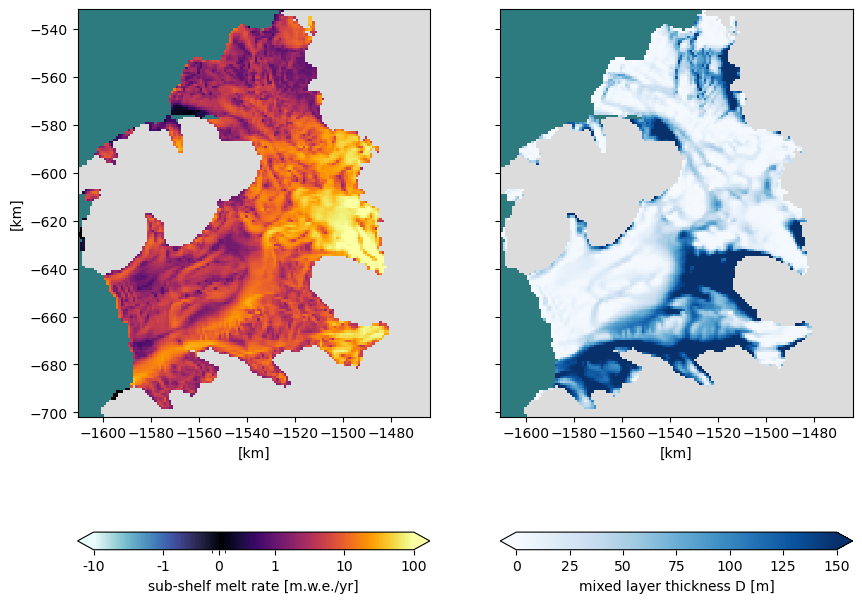

In [52]:
# Plot melt field and mixed layer depth
fig,ax = plt.subplots(1,2,figsize=(10,10),sharex=True, sharey=True)

# Show melt
im = ax[0].pcolormesh(laddie_output.x/1000, laddie_output.y/1000, laddie_output.melt, cmap = cmap_melt, norm = norm_melt)
cbar = plt.colorbar(im, ax = ax[0], extend='both', ticks=[-10,-1,0,1,10,100], orientation = 'horizontal', label='sub-shelf melt rate [m.w.e./yr]')
cbar.set_ticklabels([-10,-1,0,1,10,100])

# Show mixed layer depth
im = ax[1].pcolormesh(laddie_output.x/1000, laddie_output.y/1000, laddie_output.D, cmap = cmap_D, norm = norm_D)
cbar = plt.colorbar(im, ax = ax[1], extend='both', orientation = 'horizontal', label='mixed layer thickness D [m]')

# Set labels and mask ocean and grounded ice
for axs in ax:
    axs.set_aspect(1)
    axs.set_xlabel('[km]')
    axs.pcolormesh(laddie_output.x/1000, laddie_output.y/1000, xr.where(laddie_output.mask==0, 1, np.nan), cmap=cmap_ocean, norm=norm_ocean)
    axs.pcolormesh(laddie_output.x/1000, laddie_output.y/1000, xr.where(laddie_output.mask==2, 1, np.nan), cmap=cmap_ground, norm=norm_ground)
ax[0].set_ylabel('[km]');
